In [2]:
from pathlib2 import Path
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import re
import IPython
import librosa
import librosa.display

### data locations

In [3]:
from glob import glob

In [166]:
!ls /mnt/cube/Datasets/animalsoundarchive/

cervus_elaphus	pelobates_fuscus  recording_df.csv
crex_crex	readme.txt	  recording_df.xlsx


In [4]:
DSLOC = Path('/mnt/cube/Datasets/animalsoundarchive/pelobates_fuscus/')

In [5]:
fg_list = list(DSLOC.glob('*.mp3'))
len(fg_list), np.sort(fg_list)[-5:]

(560,
 array([PosixPath('/mnt/cube/Datasets/animalsoundarchive/pelobates_fuscus/Pelobates_fuscus_juvenil_LtH_0523_short.mp3'),
        PosixPath('/mnt/cube/Datasets/animalsoundarchive/pelobates_fuscus/Pelobates_fuscus_juvenil_LtH_0524_short.mp3'),
        PosixPath('/mnt/cube/Datasets/animalsoundarchive/pelobates_fuscus/Pelobates_fuscus_juvenil_LtH_0525_short.mp3'),
        PosixPath('/mnt/cube/Datasets/animalsoundarchive/pelobates_fuscus/Pelobates_fuscus_juvenil_LtH_0526_short.mp3'),
        PosixPath('/mnt/cube/Datasets/animalsoundarchive/pelobates_fuscus/Pelobates_fuscus_juvenil_LtH_0527_short.mp3')],
       dtype=object))

In [160]:
vocalization_lib.sort_values(by='durations', ascending=False)

,filename,species,subspecies,locality,administrative_area,country,state,scenic_area,latitude,longitude,...,species_group,null_duration,durations,ico,filename_ext,last_modified,size,description_wavdf,bytes,url
12541,Leptodactylus_syphax_77936,Leptodactylus syphax,NaN,San Sebastián,Ñuflo de Chávez,BO,Santa Cruz,Chiquitano Region,-16.362200,-62.002200,...,amphibian,False,41999,NaN,Leptodactylus_syphax_77936_short.mp3,22-Dec-2015 09:55,675K,,675000.0,http://www.tierstimmenarchiv.de/recordings/Lep...
12542,Leptodactylus_syphax_77937,Leptodactylus syphax,NaN,San Sebastián,Ñuflo de Chávez,BO,Santa Cruz,Chiquitano Region,-16.362200,-62.002200,...,amphibian,False,24345,NaN,Leptodactylus_syphax_77937_short.mp3,22-Dec-2015 09:55,442K,,442000.0,http://www.tierstimmenarchiv.de/recordings/Lep...
12543,Leptodactylus_syphax_77938,Leptodactylus syphax,NaN,San Sebastián,Ñuflo de Chávez,BO,Santa Cruz,Chiquitano Region,-16.362200,-62.002200,...,amphibian,False,10035,NaN,Leptodactylus_syphax_77938_short.mp3,22-Dec-2015 09:55,542K,,542000.0,http://www.tierstimmenarchiv.de/recordings/Lep...
12544,Leptodactylus_syphax_77939,Leptodactylus syphax,NaN,San Sebastián,Ñuflo de Chávez,BO,Santa Cruz,Chiquitano Region,-16.362200,-62.002200,...,amphibian,False,7973,NaN,Leptodactylus_syphax_77939_short.mp3,22-Dec-2015 09:55,498K,,498000.0,http://www.tierstimmenarchiv.de/recordings/Lep...
11185,Gallinago_gallinago_Bru_DAT0163_02,Gallinago gallinago,NaN,Illmitz,Neusiedl am See,AT,Burgenland,Neusiedler See,47.767778,16.780278,...,bird,False,7147,NaN,Gallinago_gallinago_Bru_DAT0163_02_short.mp3,26-Feb-2019 15:21,255K,,255000.0,http://www.tierstimmenarchiv.de/recordings/Gal...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,2016_Strauchschrecke_Gesang,Pholidoptera griseoaptera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,insect,True,0,NaN,2016_Strauchschrecke_Gesang_short.mp3,24-Jan-2014 12:25,437K,,437000.0,http://www.tierstimmenarchiv.de/recordings/201...
1987,2015_Bison_Bulle_mit_Zooatmo,Bison bison,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,mammal,True,0,NaN,2015_Bison_Bulle_mit_Zooatmo_short.mp3,24-Jan-2014 12:25,252K,,252000.0,http://www.tierstimmenarchiv.de/recordings/201...
1986,2014_Waldrapp_Gruppenrufe,Geronticus eremita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,bird,True,0,NaN,2014_Waldrapp_Gruppenrufe_short.mp3,24-Jan-2014 12:25,521K,,521000.0,http://www.tierstimmenarchiv.de/recordings/201...
1985,2013_Krontaube_dunkle_Lautfolge,Goura cristata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,bird,True,0,NaN,2013_Krontaube_dunkle_Lautfolge_short.mp3,24-Jan-2014 12:25,147K,,147000.0,http://www.tierstimmenarchiv.de/recordings/201...


In [131]:
vocalization_lib.duration.values

array(['0:0:0', '0:0:0', '0:0:0', ..., '0:0:0', '0:0:0', '0:0:0'],
      dtype=object)

In [142]:
vocalization_lib = pd.read_csv(DSLOC.parent / 'recording_df.csv')
voc_df = vocalization_lib[(vocalization_lib.species == 'Pelobates fuscus')  & (vocalization_lib.author == 'ten Hagen, Leonie')]

In [143]:
voc_df = voc_df.sort_values(by='durations', ascending=False)

In [152]:
voc_df[:3]

,filename,species,subspecies,locality,administrative_area,country,state,scenic_area,latitude,longitude,...,species_group,null_duration,durations,ico,filename_ext,last_modified,size,description_wavdf,bytes,url
15629,Pelobates_fuscus_juvenil_LtH_0527,Pelobates fuscus,NaN,Ennigerloh,Warendorf,DE,Nordrhein-Westfalen,NaN,NaN,NaN,...,amphibian,False,22,NaN,Pelobates_fuscus_juvenil_LtH_0527_short.mp3,24-Aug-2016 16:25,28K,,28000.0,http://www.tierstimmenarchiv.de/recordings/Pel...
15628,Pelobates_fuscus_juvenil_LtH_0526,Pelobates fuscus,NaN,Ennigerloh,Warendorf,DE,Nordrhein-Westfalen,NaN,NaN,NaN,...,amphibian,False,20,NaN,Pelobates_fuscus_juvenil_LtH_0526_short.mp3,24-Aug-2016 16:25,23K,,23000.0,http://www.tierstimmenarchiv.de/recordings/Pel...
15627,Pelobates_fuscus_juvenil_LtH_0525,Pelobates fuscus,NaN,Ennigerloh,Warendorf,DE,Nordrhein-Westfalen,NaN,NaN,NaN,...,amphibian,False,17,NaN,Pelobates_fuscus_juvenil_LtH_0525_short.mp3,24-Aug-2016 16:25,24K,,24000.0,http://www.tierstimmenarchiv.de/recordings/Pel...


In [144]:
row = voc_df.iloc[5]

In [161]:
row = vocalization_lib.sort_values(by='durations', ascending=False).iloc[0]

In [162]:
row

filename                                        Leptodactylus_syphax_77936
species                                               Leptodactylus syphax
subspecies                                                             NaN
locality                                                    San Sebastián 
administrative_area                                        Ñuflo de Chávez
country                                                                 BO
state                                                           Santa Cruz
scenic_area                                              Chiquitano Region
latitude                                                          -16.3622
longitude                                                         -62.0022
altitude                                                             500.0
recording_date                                                  18.11.2014
recording_time                                                       18:20
habitat                  

In [163]:
mp3_path = np.array(fg_list)[row.filename_ext == np.array([i.name for i in fg_list])][0]
mp3_path

IndexError: index 0 is out of bounds for axis 0 with size 0

In [164]:
y, sr = librosa.load(mp3_path.as_posix())
y = y[2000:-2000]

/home/AD/tsainbur/anaconda3/envs/neuroethology/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [155]:
len(y), sr, len(y)/sr

(27104, 22050, 1.2292063492063492)

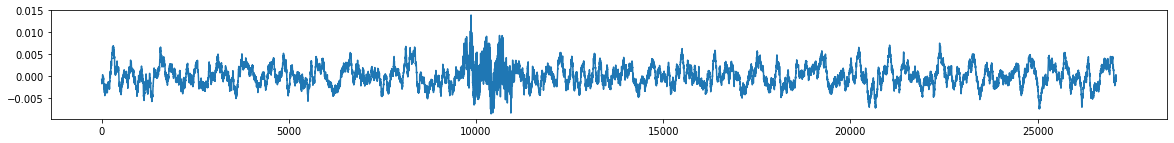

In [156]:
fig, ax = plt.subplots(figsize=(20,2))
ax.plot(y)

In [150]:
D = np.abs(librosa.stft(y, n_fft=512))**2
S_dB = librosa.power_to_db(D, ref=np.max)
spec = S_dB

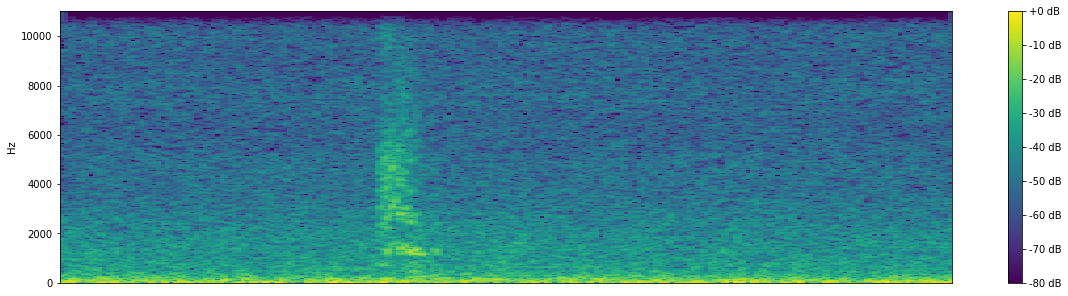

In [151]:
fig, ax = plt.subplots(figsize=(20,5))
img = librosa.display.specshow(spec, cmap='viridis', y_axis='linear', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')

In [76]:
y_noise = np.zeros(len(y))

In [77]:
from noisereduce.generate_noise import band_limited_noise

In [78]:
y_noise = band_limited_noise(2000, 6000, samples = len(y), samplerate= sr)
y_noise[:20000] = 0

In [79]:
start = 20000
stop = 60000
y_noise[start:stop] = y_noise[start:stop] * np.linspace(0, 1, stop-start)

In [80]:
y_with_noise = y+y_noise*10

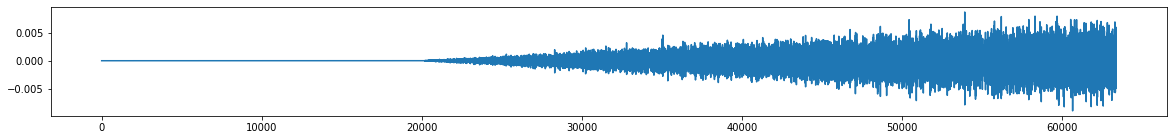

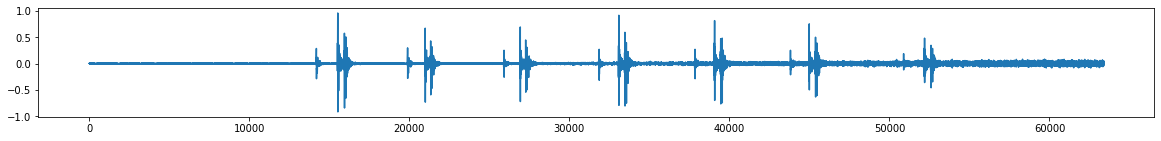

In [81]:
fig, ax = plt.subplots(figsize=(20,2))
ax.plot(y_noise)
fig, ax = plt.subplots(figsize=(20,2))
ax.plot(y_with_noise)

In [82]:
D = np.abs(librosa.stft(y_with_noise, n_fft=512))**2
S_dB = librosa.power_to_db(D, ref=np.max)
spec = S_dB

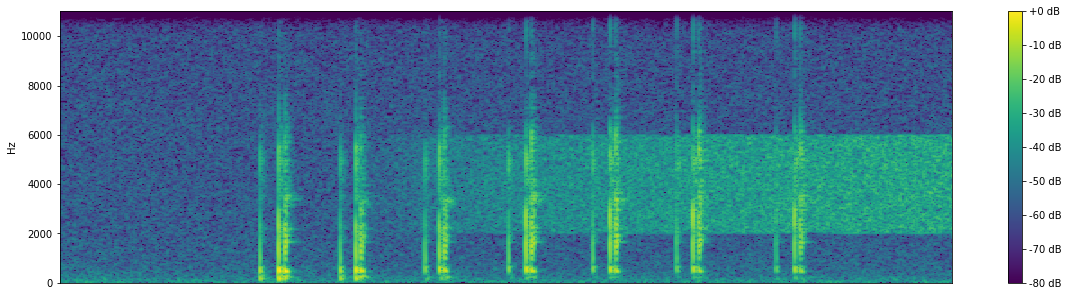

In [83]:
fig, ax = plt.subplots(figsize=(20,5))
img = librosa.display.specshow(spec, cmap='viridis', y_axis='linear', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')

In [85]:
import noisereduce as nr 

In [104]:
reduced_noise = nr.reduce_noise(y = y_with_noise, sr=sr, stationary=True, n_std_thresh_stationary = 2, n_fft = 512)

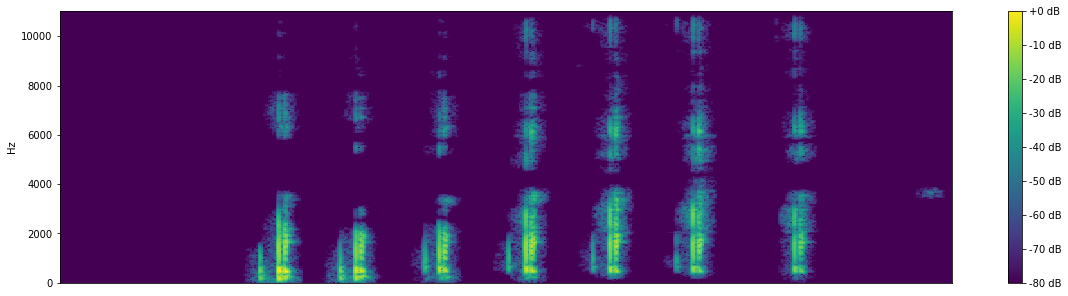

In [105]:
D = np.abs(librosa.stft(reduced_noise, n_fft=512))**2
S_dB = librosa.power_to_db(D, ref=np.max)
spec = S_dB
fig, ax = plt.subplots(figsize=(20,5))
img = librosa.display.specshow(spec, cmap='viridis', y_axis='linear', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')

In [106]:
reduced_noise = nr.reduce_noise(y = y_with_noise, sr=sr, thresh_n_mult_nonstationary=1.5,stationary=False, time_constant_s = 0.1)

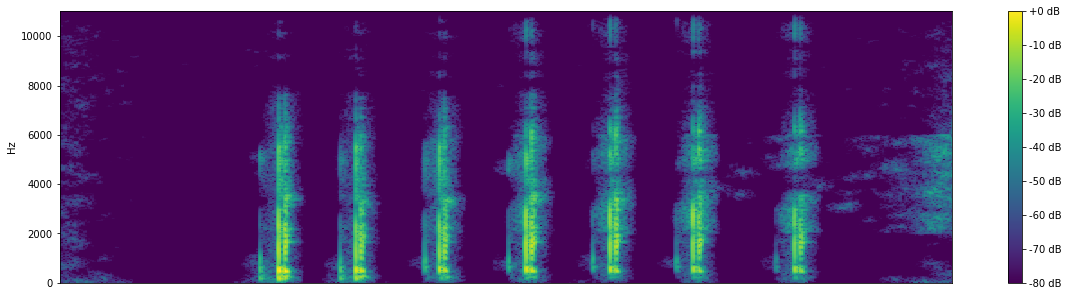

In [107]:
D = np.abs(librosa.stft(reduced_noise, n_fft=512))**2
S_dB = librosa.power_to_db(D, ref=np.max)
spec = S_dB
fig, ax = plt.subplots(figsize=(20,5))
img = librosa.display.specshow(spec, cmap='viridis', y_axis='linear', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')